In [61]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

## Problem statement

In [ ]:
Prediction of Graduate Admissions from an Indian perspective.

Content
Dataset contains under given important parameters which are considered mainly during application for Masters Programs.
Parameters description:
    
#Following are the input features:
GRE Scores ( out of 340 )
TOEFL Scores ( out of 120 )
University Rating ( out of 5 )
Statement of Purpose -(SOP) Strength ( out of 5 )
Letter of Recommendation-(LOR) Strength ( out of 5 )
Undergraduate GPA-CGPA ( out of 10 )
Research Experience ( either 0 or 1 )

# Following is the target feature
Chance of Admit ( ranging from 0 to 1 )

Inspiration
Results will help students in shortlisting universities with their profiles. 
Predicted output can provide students a fair idea about their chances for a particular university.

Following are the input features

## Data Gathering

In [2]:
df=pd.read_csv("admission_data.csv")
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [38]:
df.isna().value_counts()

GRE Score  TOEFL Score  University Rating  SOP    LOR    CGPA   Research  Chance of Admit 
False      False        False              False  False  False  False     False               500
dtype: int64

In [93]:
x=df.drop('Chance of Admit ',axis=1)
y=df['Chance of Admit ']

## EDA

In [3]:
df=pd.read_csv("admission_data.csv")
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [7]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
df['GRE Score']

0      337
1      324
2      316
3      322
4      314
      ... 
495    332
496    337
497    330
498    312
499    327
Name: GRE Score, Length: 500, dtype: int64

<AxesSubplot:xlabel='GRE Score', ylabel='Density'>

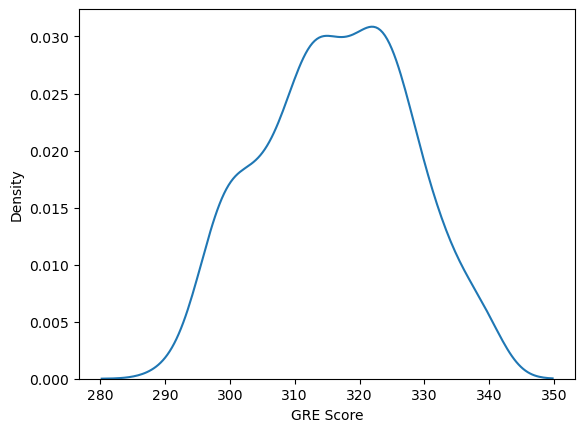

In [9]:
sns.kdeplot(df['GRE Score'])

<AxesSubplot:xlabel='TOEFL Score', ylabel='Density'>

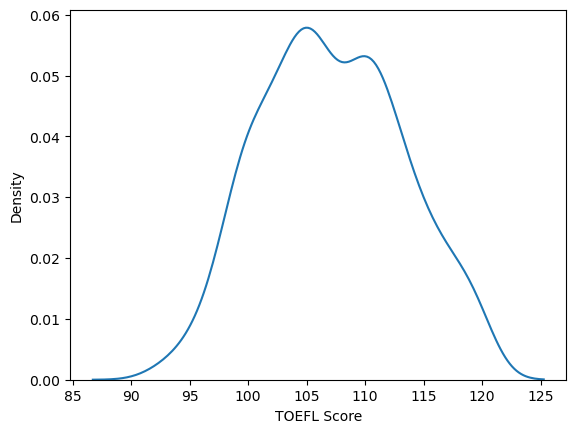

In [10]:
sns.kdeplot(df['TOEFL Score'])

<AxesSubplot:xlabel='University Rating', ylabel='Density'>

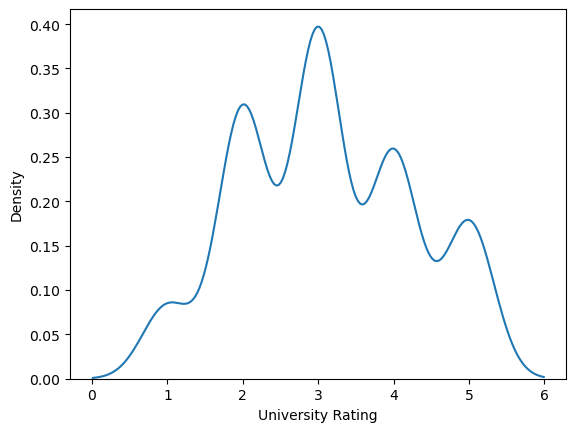

In [11]:
sns.kdeplot(df["University Rating"])

<AxesSubplot:xlabel='SOP', ylabel='Density'>

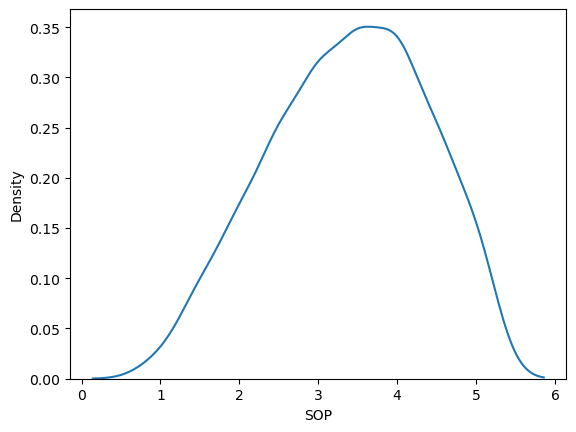

In [14]:
sns.kdeplot(df["SOP"])

<AxesSubplot:xlabel='LOR ', ylabel='Density'>

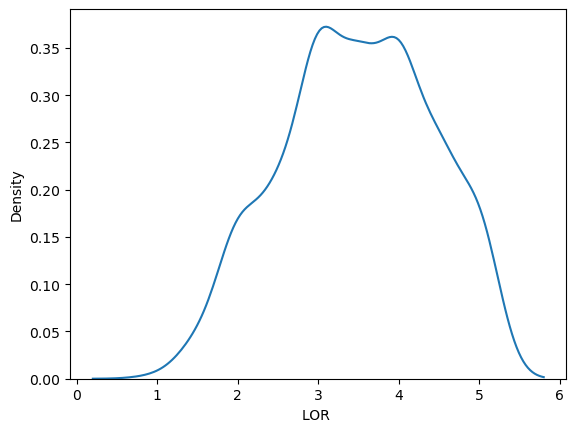

In [16]:
sns.kdeplot(df['LOR '])

<AxesSubplot:xlabel='CGPA', ylabel='Density'>

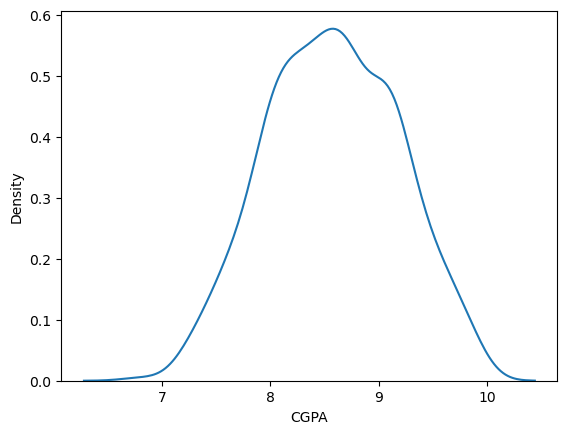

In [17]:
sns.kdeplot(df['CGPA'])

In [18]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

<AxesSubplot:xlabel='Research', ylabel='Density'>

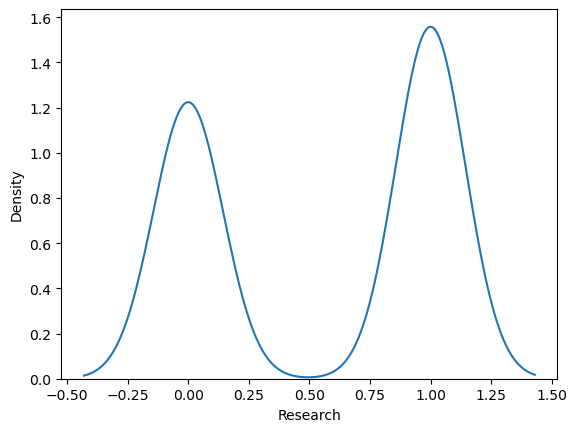

In [19]:
sns.kdeplot(df["Research"])

<AxesSubplot:xlabel='Chance of Admit ', ylabel='Density'>

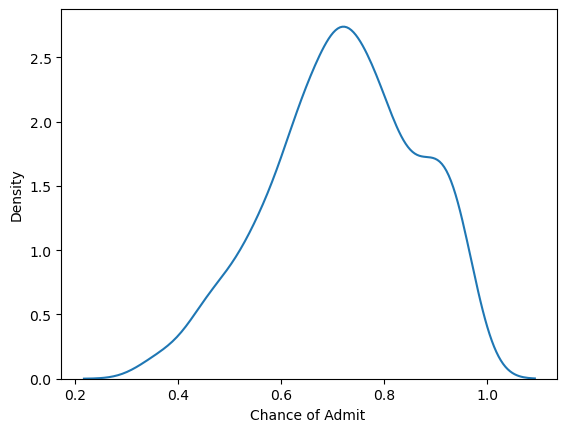

In [20]:
sns.kdeplot(df['Chance of Admit '])

## Feature Engineering

# Feature selection

### assumptions

##### 1)linearity

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit '>

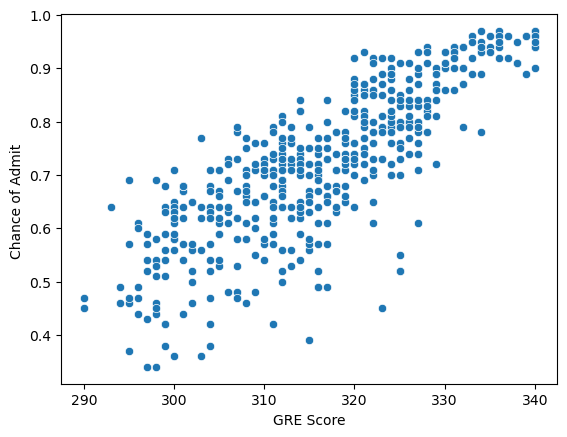

In [103]:
sns.scatterplot(x['GRE Score'],y)

In [86]:
df.corr().tail(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.0


In [101]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

<AxesSubplot:>

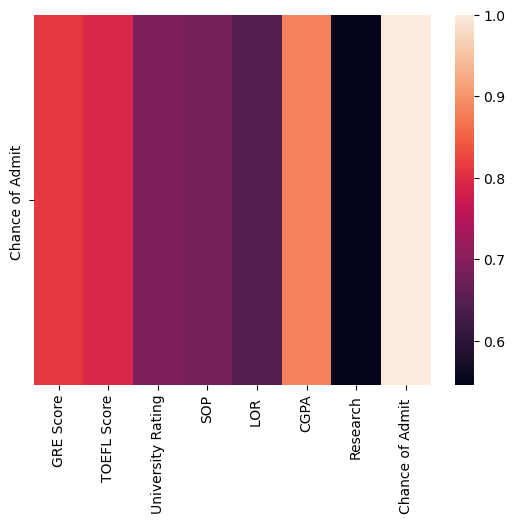

In [87]:
sns.heatmap(df.corr().tail(1))

## Model Training

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)
x_train.shape,y_train.shape,y_test.shape,x_test.shape

((375, 7), (375,), (125,), (125, 7))

In [64]:
lin_model=LinearRegression()

In [65]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [66]:
lin_model.coef_

array([0.00216508, 0.00331129, 0.00237087, 0.00121341, 0.01705316,
       0.11682683, 0.024134  ])

In [67]:
lin_model.intercept_

-1.4041160492611477

In [68]:
y_pred=lin_model.predict(x_train)

In [58]:
df.head(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92


In [63]:
mean_absolute_error(y_train,y_pred)

0.04251234385111586

In [75]:
def model_eval(model,x,y):
    y_pred=model.predict(x)
    mae=mean_absolute_error(y,y_pred)
    mse=mean_squared_error(y,y_pred)
    R2=r2_score(y,y_pred)
    print(f"mean squared error={mse}")
    print()
    print(f"mean absolute error={mae}")
    print()
    print(f"r 2 score={R2}")
    
    return "evaluation done"

In [76]:
model_eval(lin_model,x_train,y_train)

mean squared error=0.003550515867188403

mean absolute error=0.04251234385111586

r 2 score=0.8223444375427977


'evaluation done'